In [1]:
from importlib import reload
from slr import historical


In [2]:
from slr import slrprojections
from slr import utils
reload(historical)
reload(slrprojections)
reload(utils)
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
utils._validate_location(location=0)

'San Francisco'

In [4]:
slrprojections.SLRProjections.from_location(location="9410660")

Sea level rise at Los Angeles, CA; 3 Scenario(s) available

In [6]:
sf = slrprojections.SLRProjections.from_location(0)
sf.convert(to_units='mm')

,"Low Risk, 83.00% [mm]","Medium Risk, 99.50% [mm]","Extreme Risk, nan% [mm]"
Year (baseline: 2000),,,
2030,152.392563,243.828101,304.785126
2040,243.828101,396.220664,548.613228
2050,335.263639,579.091740,822.919842
2060,457.177690,792.441329,1188.661993
2070,579.091740,1066.747943,1584.882658
2080,731.484304,1371.533069,2011.581835
2090,883.876867,1706.796708,2529.716550
2100,1036.269430,2103.017373,3108.808290


In [7]:
hs = historical.HistoricalSLR.from_slrprojections(slrprojections=sf)

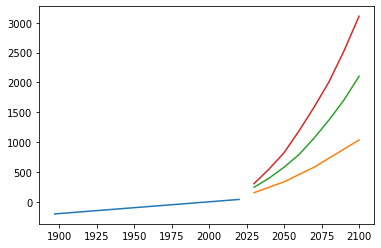

In [8]:
# Build a linear trend as simpy as possible from the historical payload
fig, ax = plt.subplots(1, 1)
ax.plot(hs.timeseries.index.year, hs.timeseries.values)
for scenario_ in sf.scenarios:
    ax.plot(
        scenario_.data.x,
        scenario_.data.y
    )